In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from src.utils.notebook_imports import *
from pyforest import *
from src.visualization.Visualize import show_2D_or_3D
import SimpleITK as sitk
import glob
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
from skimage import measure
import tensorflow_addons as tfa

search for root_dir and set working directory
Working directory set to: /home/minority/git/cardio



# Libraries for connected component analysis

cv2
cv2.connectedComponentsWithStats
--> find connected components in 2D
stats could be used to filter the biggest area per label

-------------------------------

skimage
skimage.measure.label
--> labels connected structures with ids, returns a tensor with the same shape

--------------------------------

scipy
scipy.ndimage.find_objects
--> returns slice operators to slice each label
scipy.ndimage.label
--> labels connected structures with ids, returns a tensor with the same shape

--------------------------------

cc3d.connected components
--> does the same as maesure.label

tf.contrib.image.connected_component
--> not included in tf2

# Select an experiment folder

In [2]:
@interact
def select_folder(folder= glob.glob('/home/minority/datasets/Outliers/**/')):
    global files
    globals()['folder'] = folder
    print(folder)
    files = sorted(glob.glob('{}/**/*.nrrd'.format(folder)))
    return files

interactive(children=(Dropdown(description='folder', options=('/home/minority/datasets/Outliers/ACDC_GCN/', '/…

In [3]:
@interact
def load_nrrd(file = files):
    print(file)
    show_2D_or_3D(sitk.ReadImage(file))

interactive(children=(Dropdown(description='file', options=('/home/minority/datasets/Outliers/ACDC_GCN/1KLZMGE…

In [4]:
@interact_manual
def load_nrrd(image = sorted(glob.glob('{}/**/*image.nrrd'.format(folder)))):
    import SimpleITK as sitk
    from sklearn.preprocessing import StandardScaler
    global img, pred, gt
    print(image)
    img = sitk.GetArrayFromImage(sitk.ReadImage(image))
    #img = np.stack([StandardScaler().fit_transform(i) for i in img])
    pred = sitk.GetArrayFromImage(sitk.ReadImage(image.replace('image', 'pred')))
    gt = sitk.GetArrayFromImage(sitk.ReadImage(image.replace('image', 'gt')))
    assert img.shape[0] < 50, 'to many slices found, wrong shape?: {}'.format(img.shape)
    print(img.shape)
    print('GT')
    show_2D_or_3D(img=img, mask=gt)
    plt.show()
    print('Pred')
    show_2D_or_3D(img=img, mask=pred)
    plt.show()
    cleaned = clean_3d_prediction_3d_cc(pred)
    print('cleaned by biggest connected component per label')
    show_2D_or_3D(img=img, mask=cleaned)

interactive(children=(Dropdown(description='image', options=('/home/minority/datasets/Outliers/ACDC_GCN/1KLZMG…

In [8]:
list(map(np.mean, pred))

<IPython.core.display.Javascript object>

[0.09893176020408163,
 0.07481664540816327,
 0.09020248724489796,
 0.11597177933673469,
 0.1310188137755102,
 0.14118303571428573,
 0.1504504145408163,
 0.17315051020408162,
 0.0]

(array([[224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.],
        [224.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 224 Lists of Patches objects>)

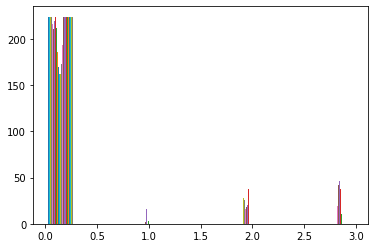

In [6]:
plt.hist(pred[5])

In [13]:
# scipy find objects by value
objects = ndimage.find_objects(pred)

In [14]:
objects

[(slice(0, 7, None), slice(84, 172, None), slice(48, 97, None)),
 (slice(0, 8, None), slice(83, 167, None), slice(48, 120, None)),
 (slice(0, 8, None), slice(80, 158, None), slice(48, 116, None))]

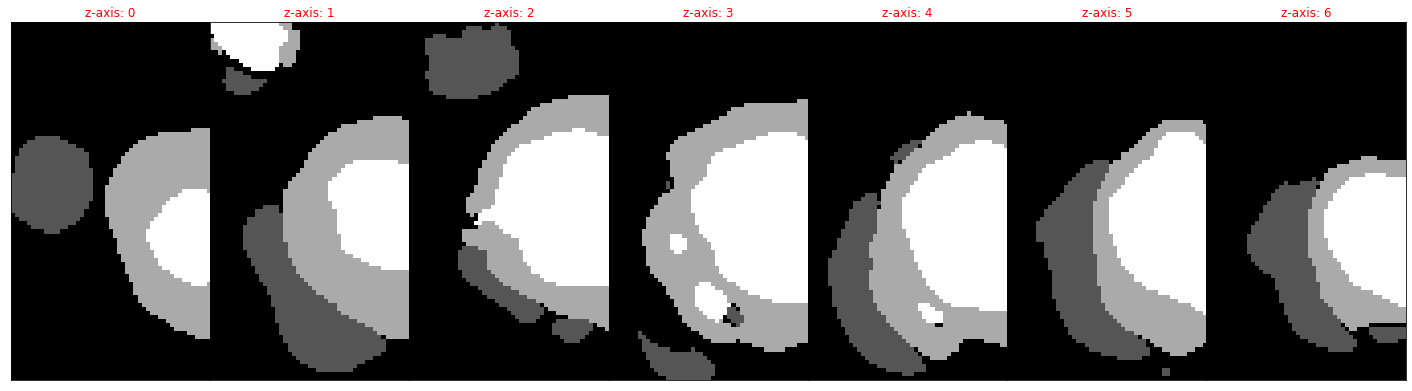

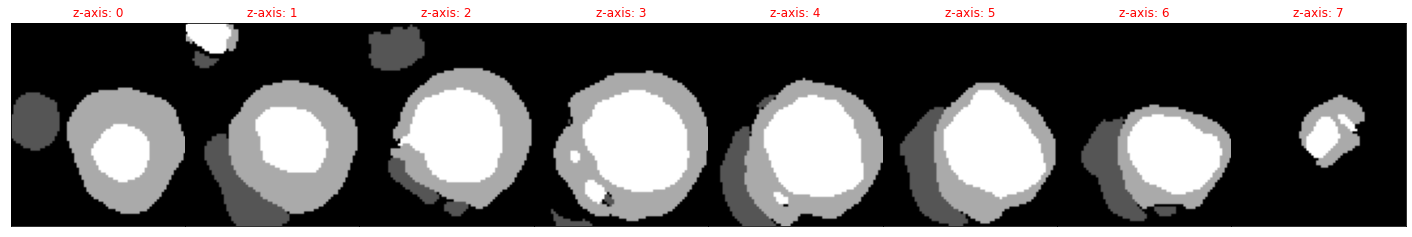

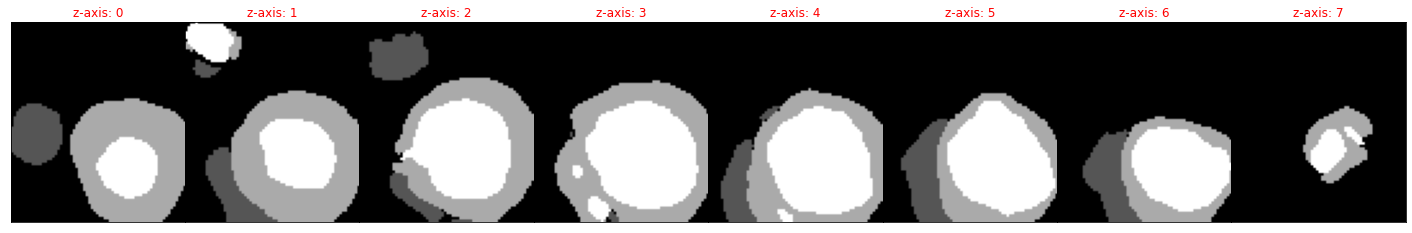

In [15]:
for o in objects:
    show_2D_or_3D(pred[o])

<IPython.core.display.Javascript object>

1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

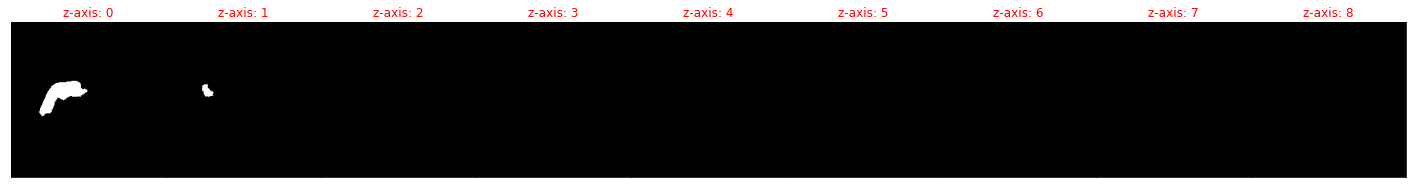

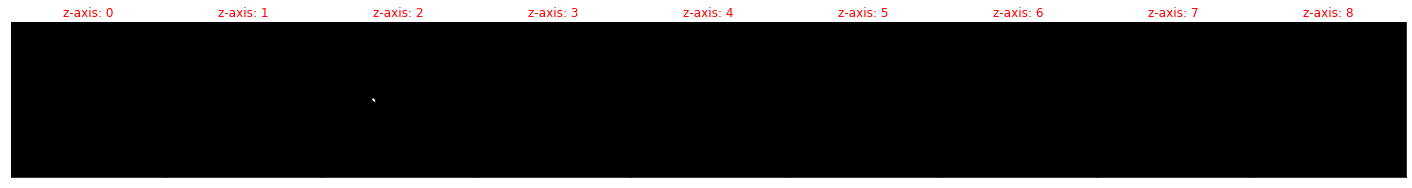

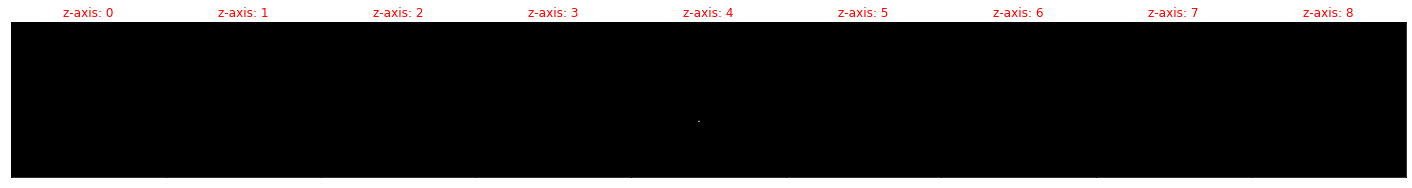

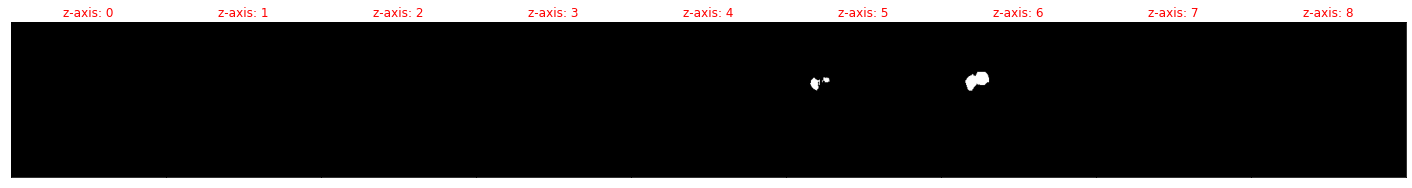

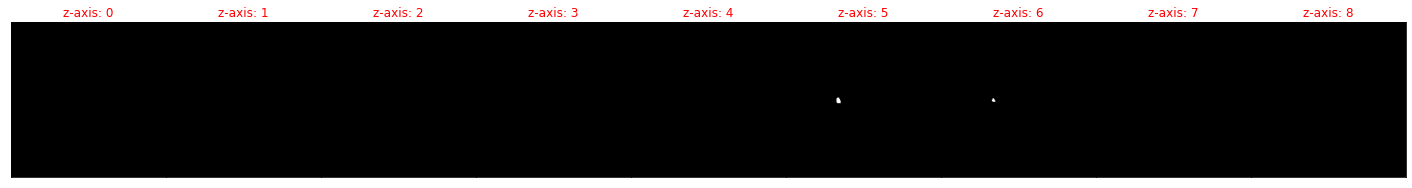

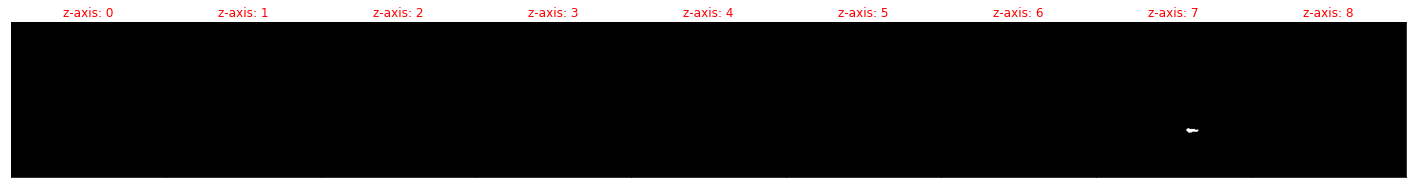

2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

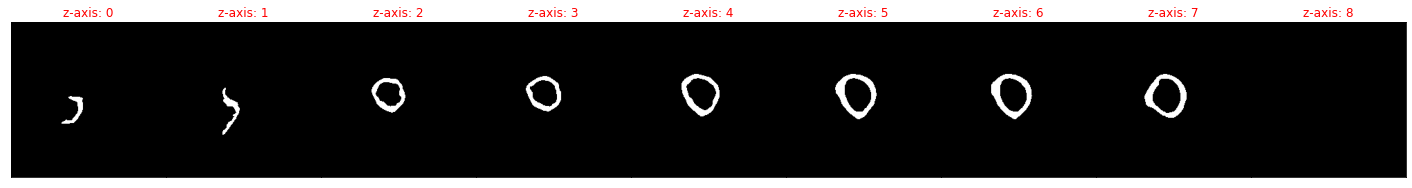

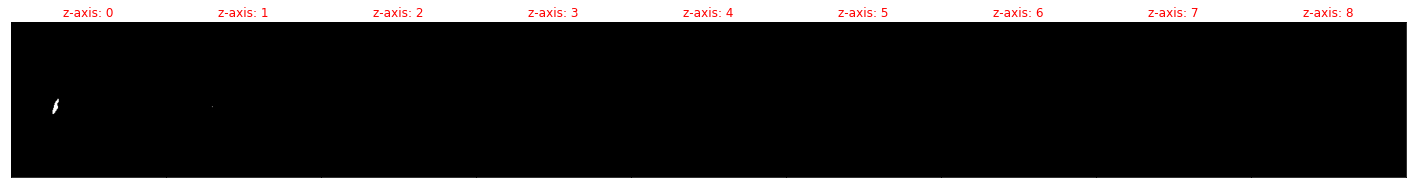

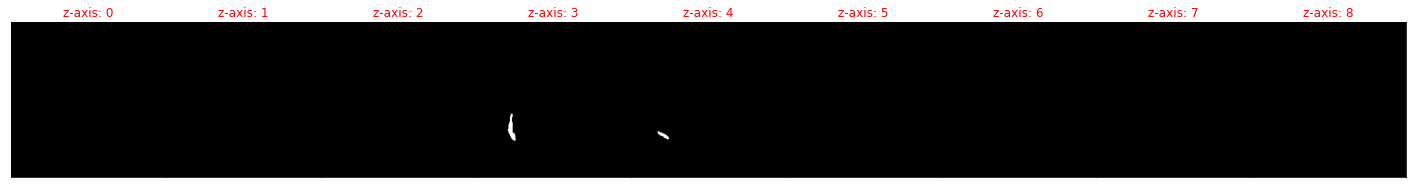

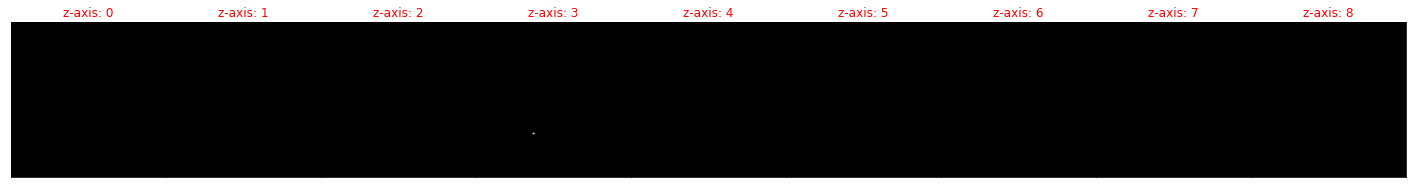

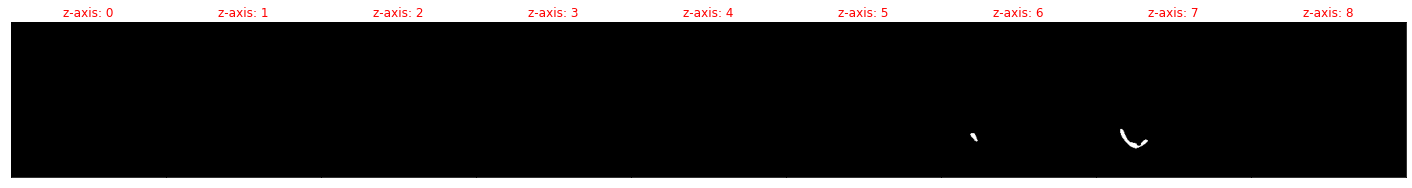

3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

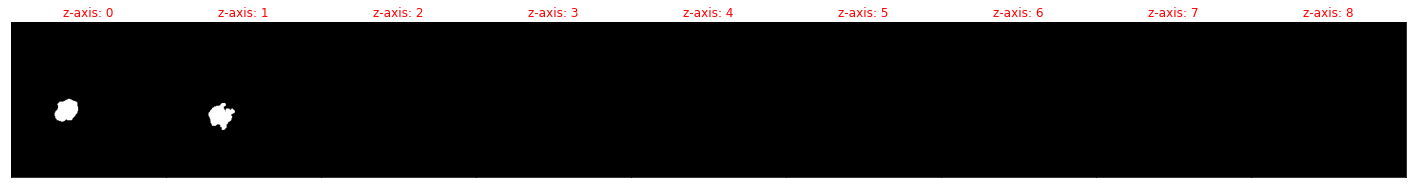

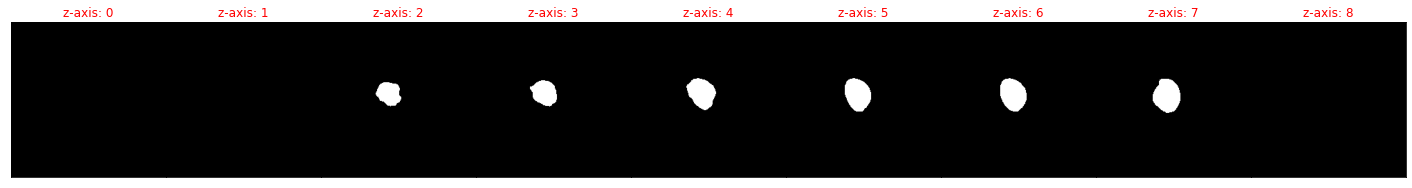

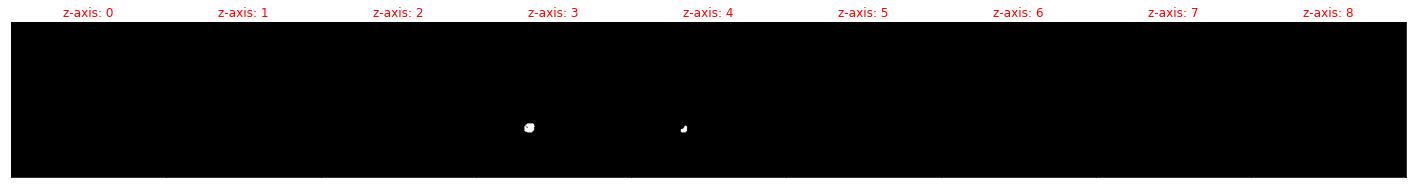

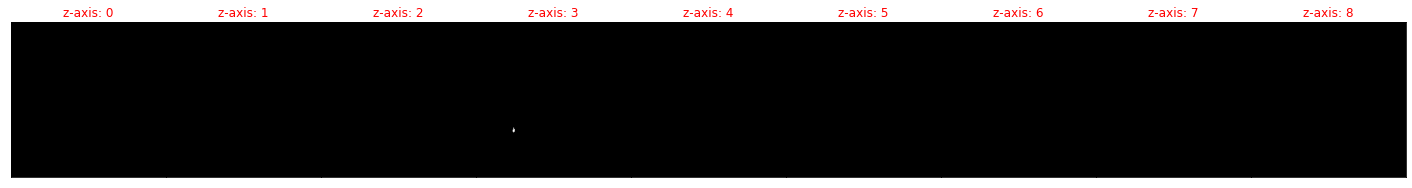

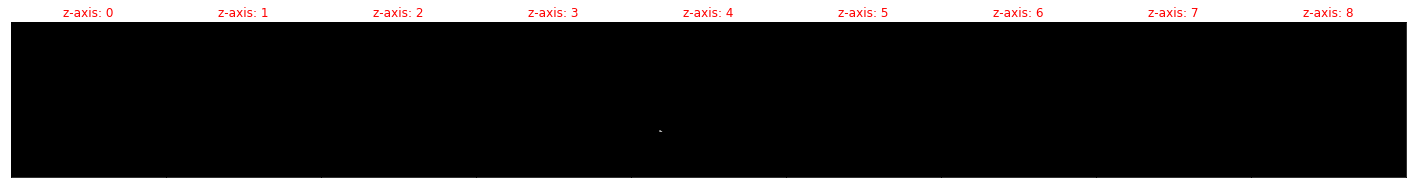

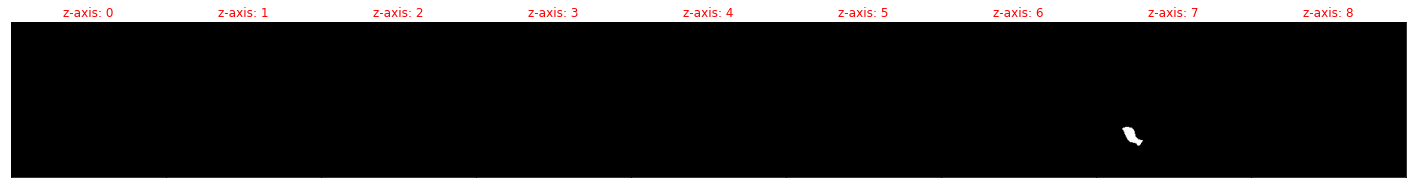

In [72]:
# find connected components in a 3D volume
for val in np.unique(pred)[1:]:
    print(val)
    mask = np.uint8(pred == val)
    labels_out = cc3d.connected_components(mask)
    for l in np.unique(labels_out)[1:]:
        show_2D_or_3D(labels_out == l)
        plt.show()

In [47]:
print(pred.shape)
print(cleaned.shape)

(7, 224, 224)
(7, 224, 224)


In [5]:
def clean_3d_prediction_2d_cc(pred):
    
    cleaned = []
    # for each slice
    for s in pred:
        new_img = np.zeros_like(s)                                        # step 1
        # for each label
        for val in np.unique(s)[1:]:                                      # step 2
            mask = np.uint8(s == val)                                     # step 3
            labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  # step 4
            largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      # step 5
            new_img[labels == largest_label] = val                          # step 6
        cleaned.append(new_img)
    return np.stack(cleaned, axis=0)

# Filter biggest connected component in 2D

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

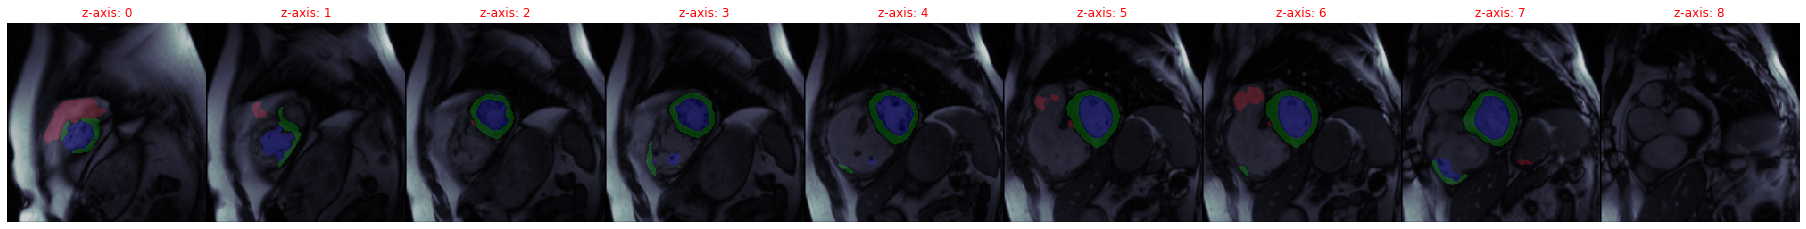

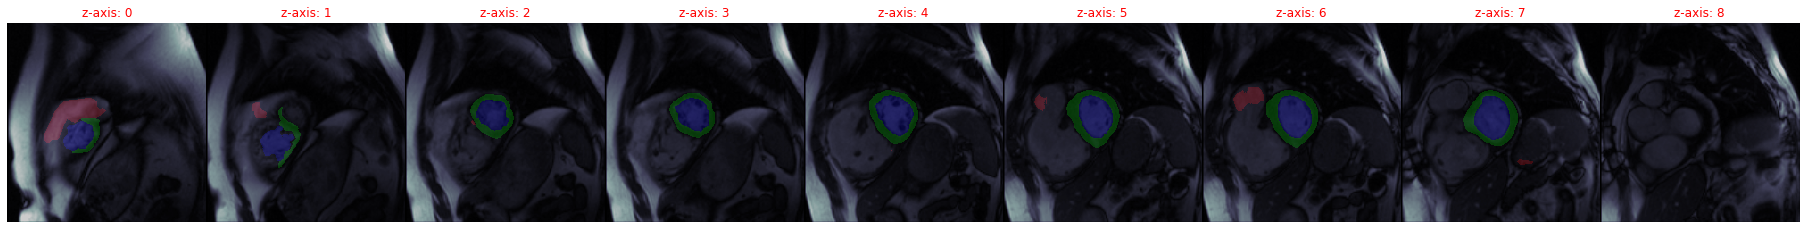

In [74]:
# iterate over all slices, 
# find and filter 2D connected components per label value
cleaned = []

for s in pred:
    new_img = np.zeros_like(s)                                        # step 1
    for val in np.unique(s)[1:]:                                      # step 2
        mask = np.uint8(s == val)                                     # step 3
        labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  # step 4
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      # step 5
        new_img[labels == largest_label] = val                          # step 6
    cleaned.append(new_img)
cleaned = np.stack(cleaned, axis=0)
show_2D_or_3D(img=img, mask=pred)
show_2D_or_3D(img=img,mask=cleaned)
plt.show()

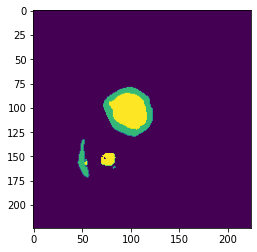

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

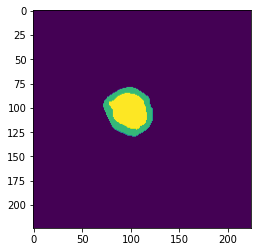

In [85]:
# 2D example of the 2D opencv filtering

for s in pred[3:4]:
    plt.imshow(s)
    plt.show()
    new_img = np.zeros_like(s)                                        # step 1
    for val in np.unique(s)[1:]:                                      # step 2
        mask = np.uint8(s == val)                                     # step 3
        labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  # step 4
        #print(stats)
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      # step 5
        new_img[labels == largest_label] = val                          # step 6
    plt.imshow(new_img)
    plt.show()

# Label 3d volumes

In [7]:
def clean_3d_prediction_3d_cc_plot(pred):
    """
    Find the biggest connected component per label
    This is a debugging method, which will plot each step
    returns: a tensor with the same shape as pred, but with only one cc per label
    """
    
    # avoid labeling images with float values
    assert len(np.unique(pred)) < 10, 'to many labels: {}'.format(len(np.unique(pred)))
    
    cleaned = np.zeros_like(pred)
    
    def clean_3d_label(val):
        print('label: {}'.format(val))
        
        # create a placeholder
        biggest = np.zeros_like(pred)
        biggest_size = 0
        
        # find all cc for this label
        all_labels = measure.label(np.uint8(pred==val), background=0)
        
        for c in np.unique(all_labels)[1:]:
            print('component no: {}'.format(c))
            mask = all_labels == c
            mask_size = mask.sum()
            print('size:{}'.format(mask_size))
            if mask_size > biggest_size:
                biggest = mask
                biggest_size = mask_size
            show_2D_or_3D(mask)
            plt.show()
        print('selected component (size: {}) for label: {}'.format(biggest_, val))
        show_2D_or_3D(biggest)
        plt.show()
        
        return biggest
    
    
    for val in np.unique(pred)[1:]:
        biggest = clean_3d_label(val)
        cleaned[biggest] = val
        
    return cleaned
        

In [7]:
def clean_3d_prediction_3d_cc(pred):
    """
    Find the biggest connected component per label
    This is a debugging method, which will plot each step
    returns: a tensor with the same shape as pred, but with only one cc per label
    """
    
    # avoid labeling images with float values
    assert len(np.unique(pred)) < 10, 'to many labels: {}'.format(len(np.unique(pred)))
    
    cleaned = np.zeros_like(pred)
    
    def clean_3d_label(val):
        
        """
        has access to pred, no passing required
        """

        # create a placeholder
        biggest = np.zeros_like(pred)
        biggest_size = 0
        
        # find all cc for this label
        # tensorflow operation is only in 2D
        #all_labels = tfa.image.connected_components(np.uint8(pred==val)).numpy()
        all_labels = measure.label(np.uint8(pred==val), background=0)
        
        for c in np.unique(all_labels)[1:]:
            mask = all_labels == c
            mask_size = mask.sum()
            if mask_size > biggest_size:
                biggest = mask
                biggest_size = mask_size        
        return biggest

    for val in np.unique(pred)[1:]:
        biggest = clean_3d_label(val)
        cleaned[biggest] = val
    return cleaned
        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

label: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

component no: 1
size:1702


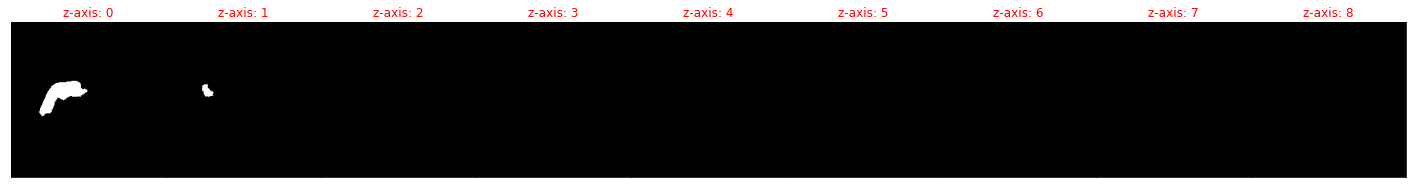

component no: 2
size:14


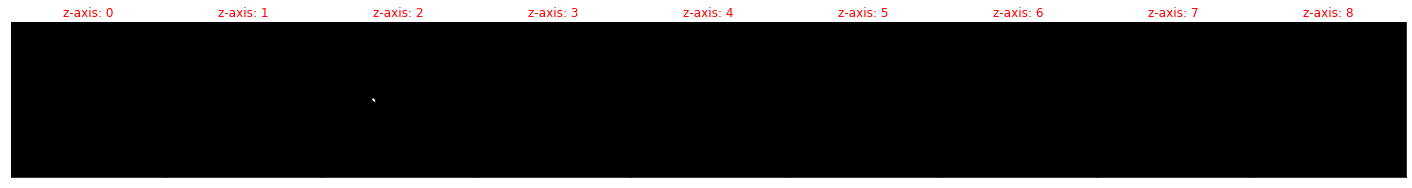

component no: 3
size:3


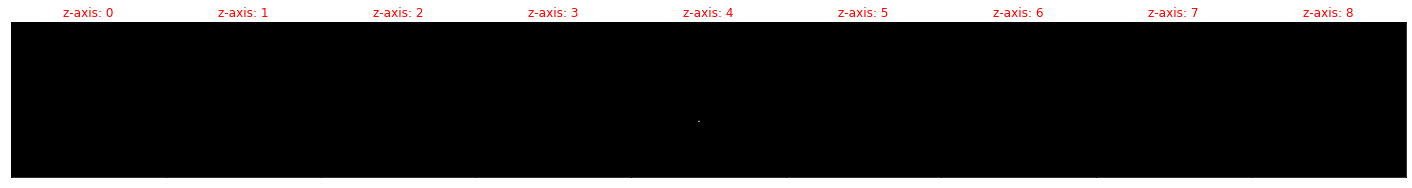

component no: 4
size:786


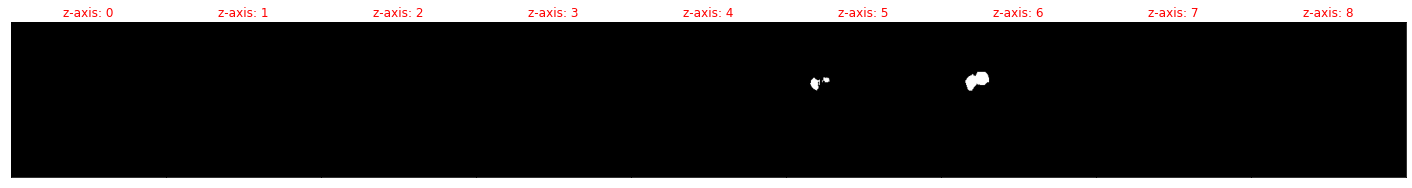

component no: 5
size:58


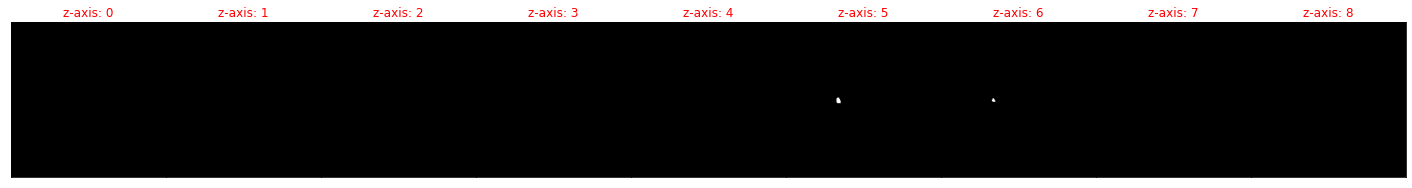

component no: 6
size:72


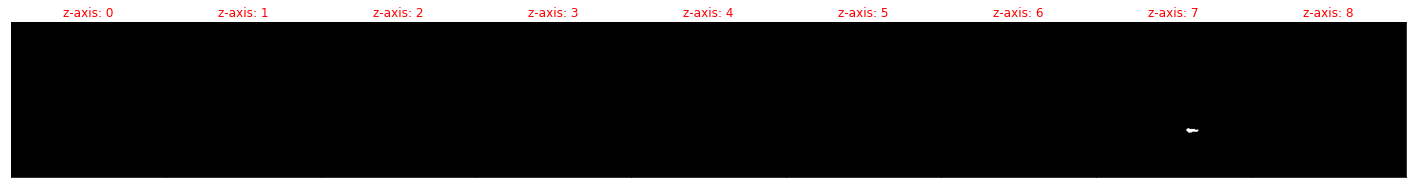

selected component (size: 7619) for label: 1


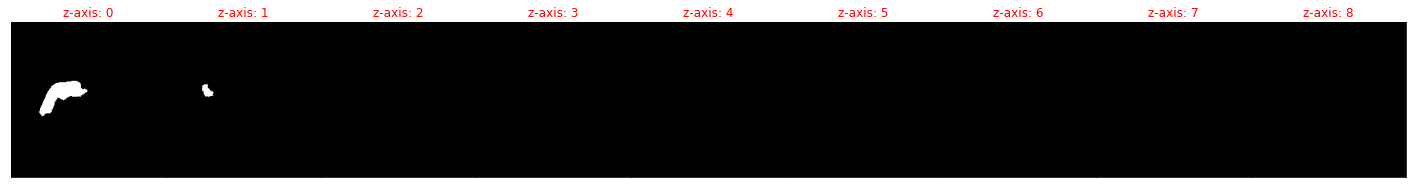

label: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

component no: 1
size:7570


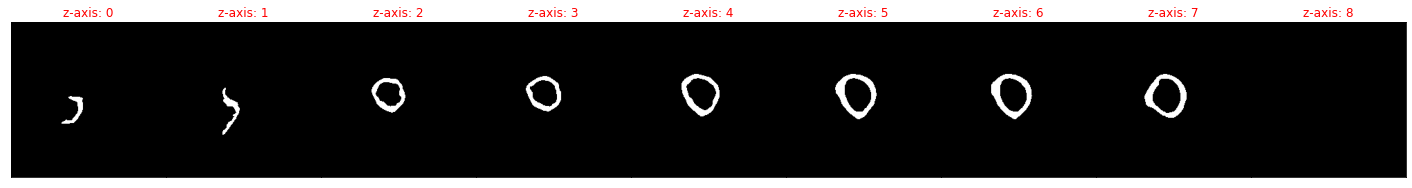

component no: 2
size:98


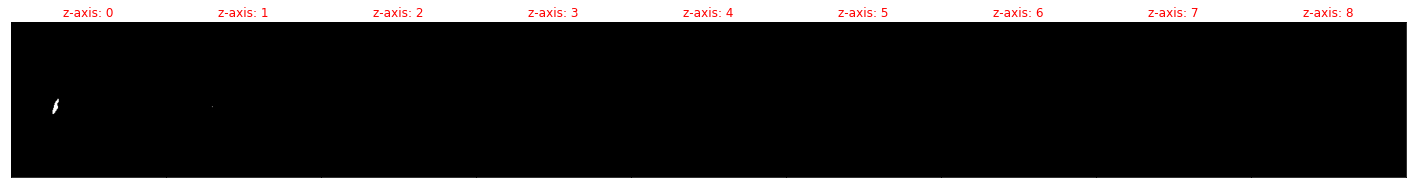

component no: 3
size:277


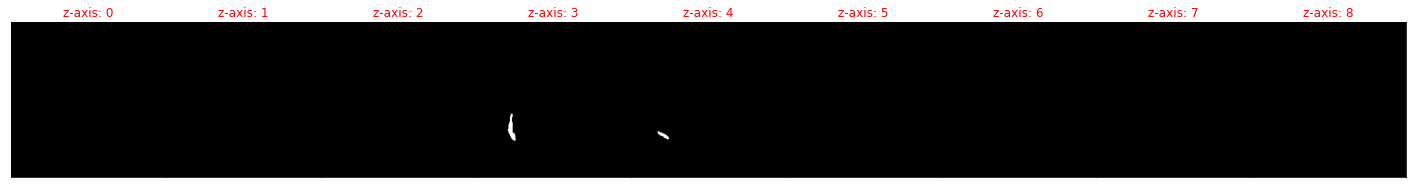

component no: 4
size:5


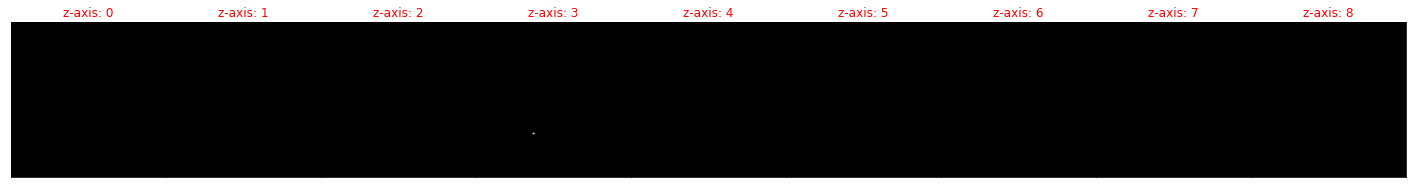

component no: 5
size:321


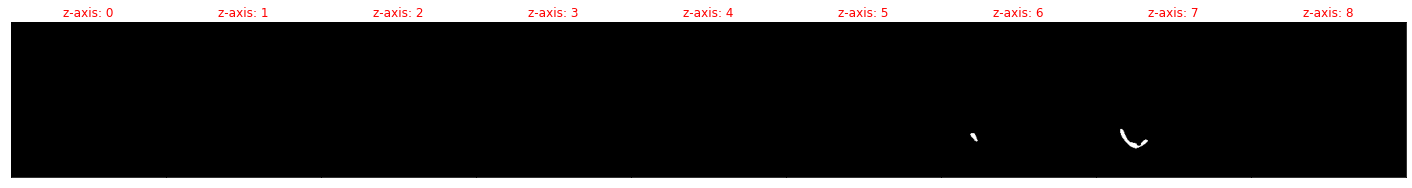

selected component (size: 7619) for label: 2


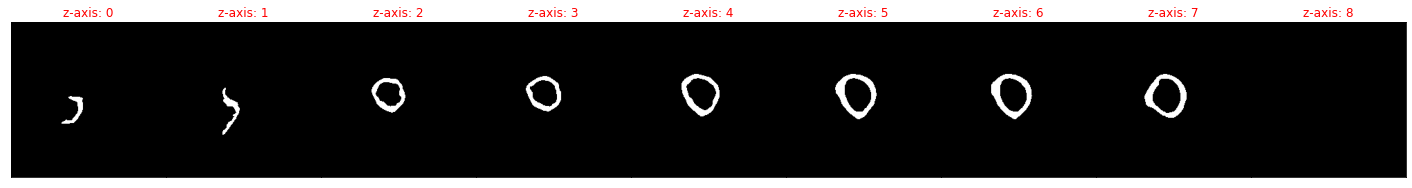

label: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

component no: 1
size:1698


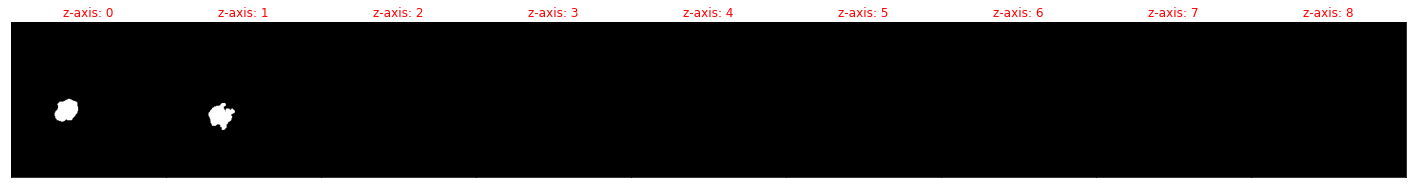

component no: 2
size:7619


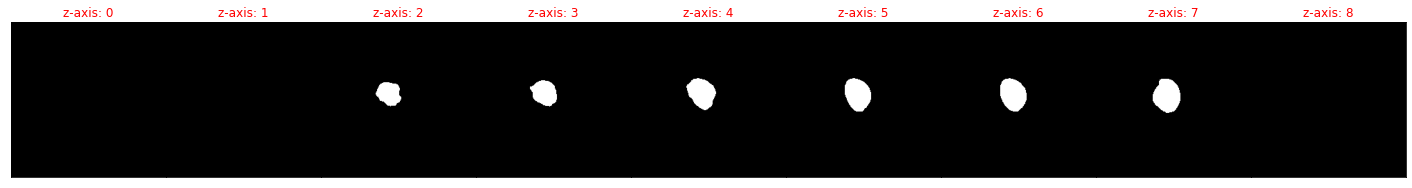

component no: 3
size:219


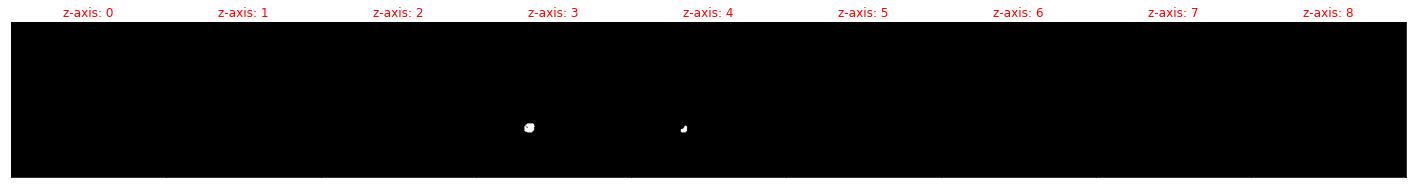

component no: 4
size:14


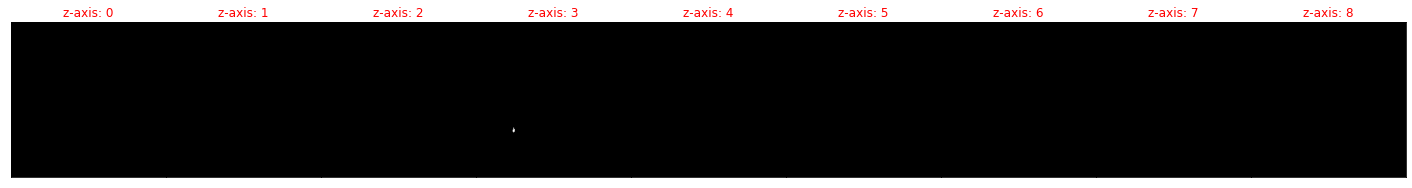

component no: 5
size:6


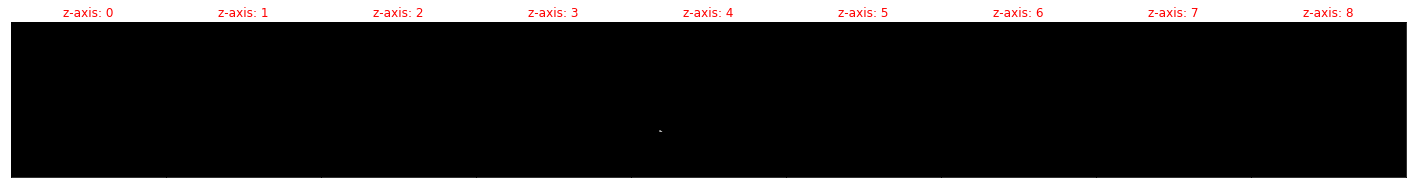

component no: 6
size:371


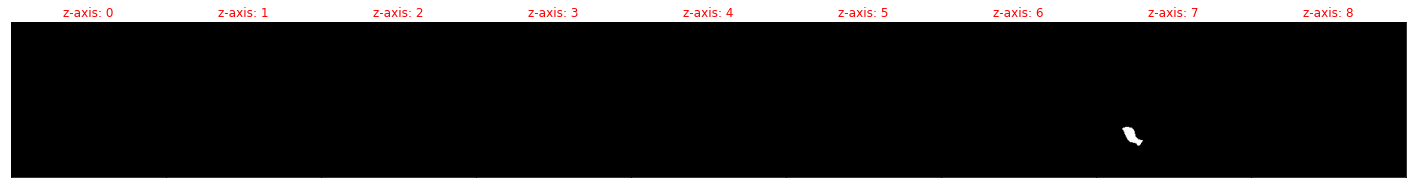

selected component (size: 7619) for label: 3


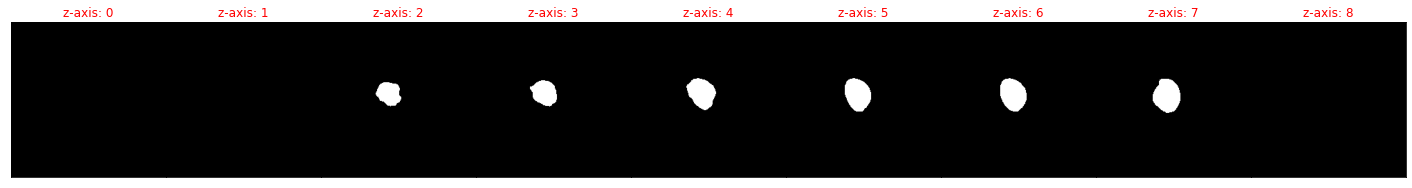

In [119]:
clean = clean_3d_prediction_3d_cc(pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

label: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1
size:1702


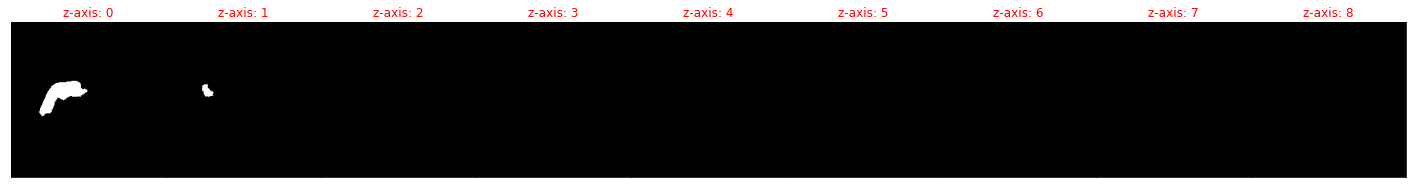

2
size:14


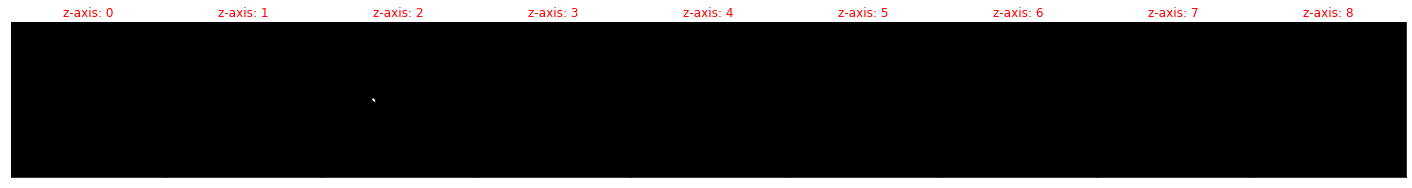

3
size:3


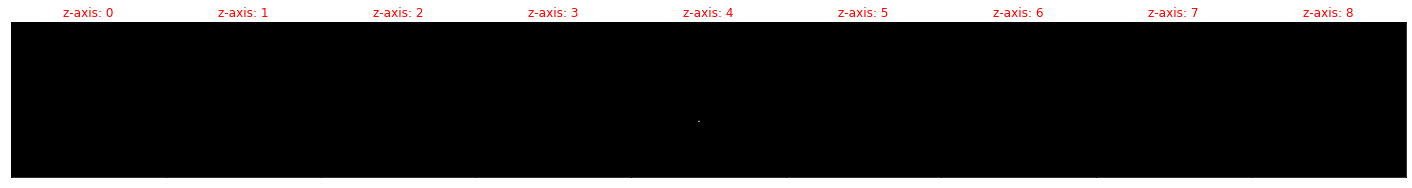

4
size:786


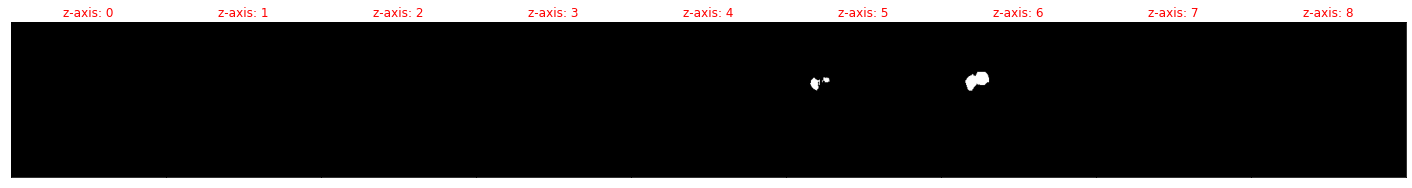

5
size:58


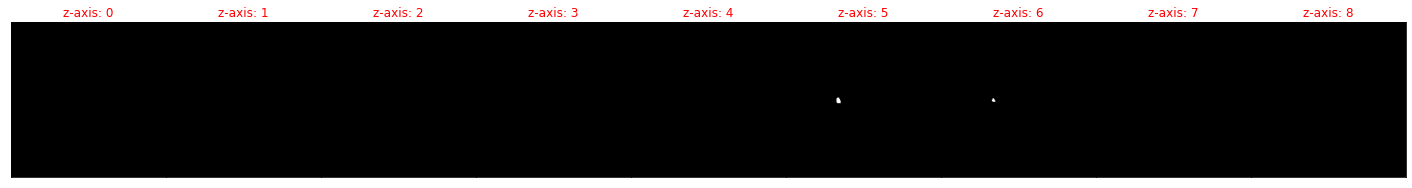

6
size:72


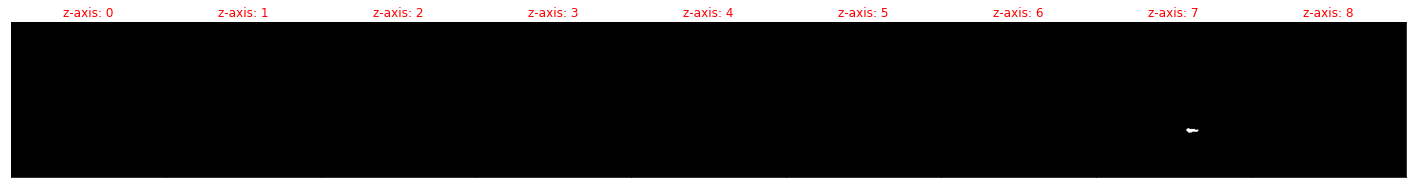

selected component (size: 1702) for label: 1


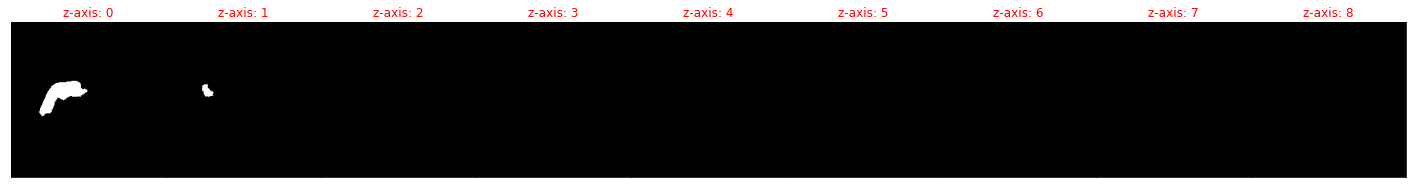

label: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1
size:7570


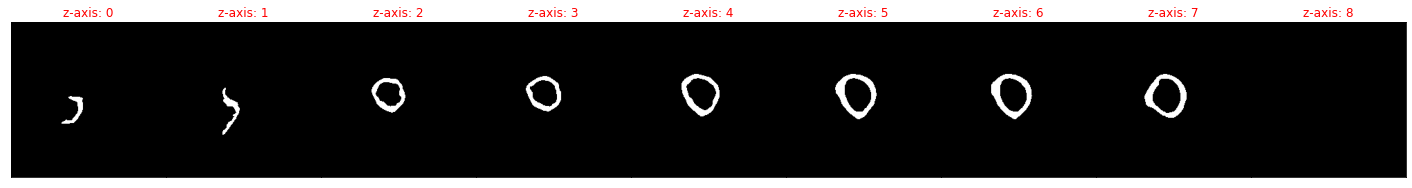

2
size:98


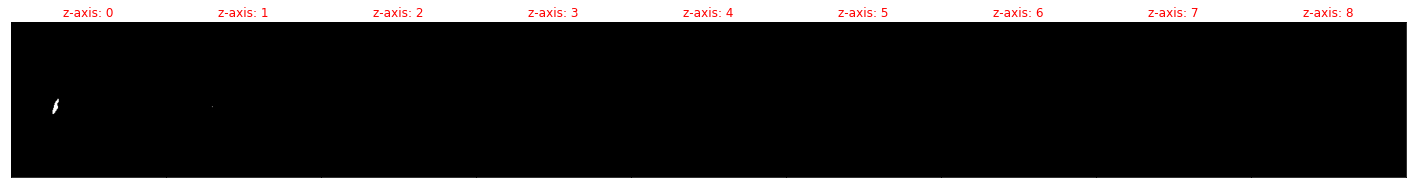

3
size:277


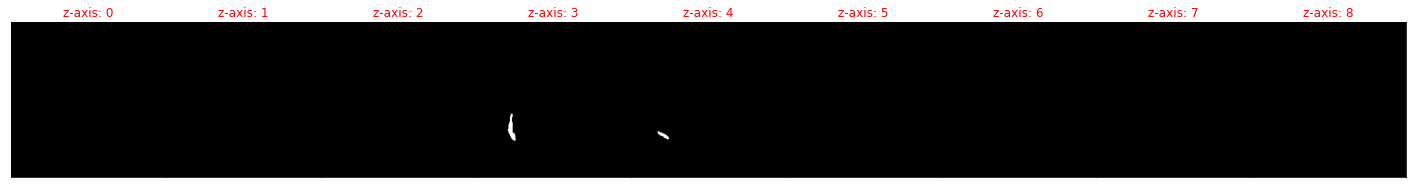

4
size:5


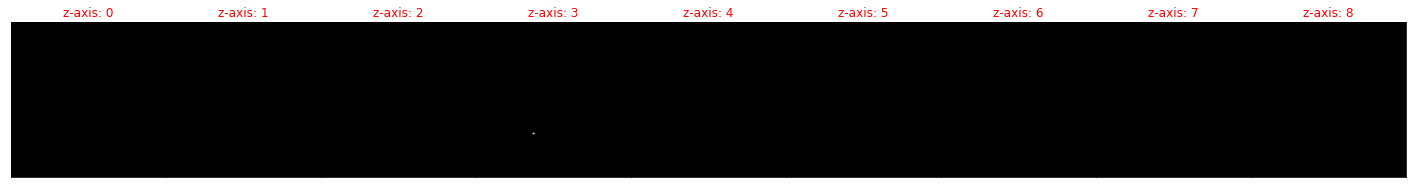

5
size:321


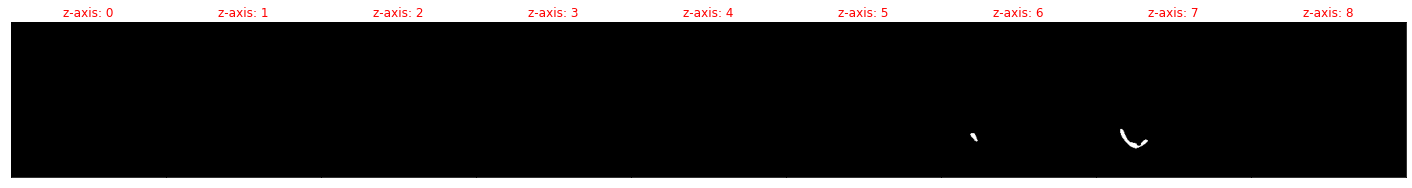

selected component (size: 7570) for label: 2


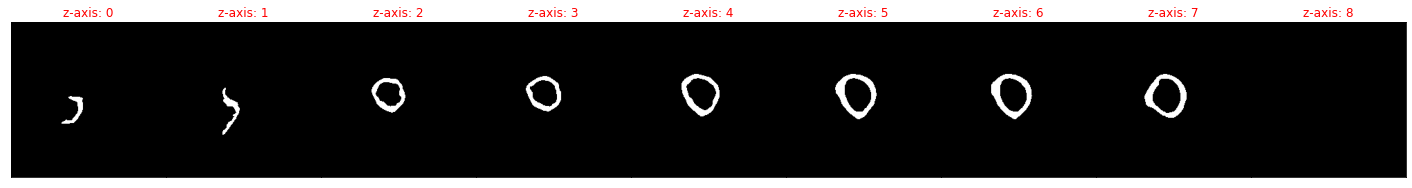

label: 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1
size:1698


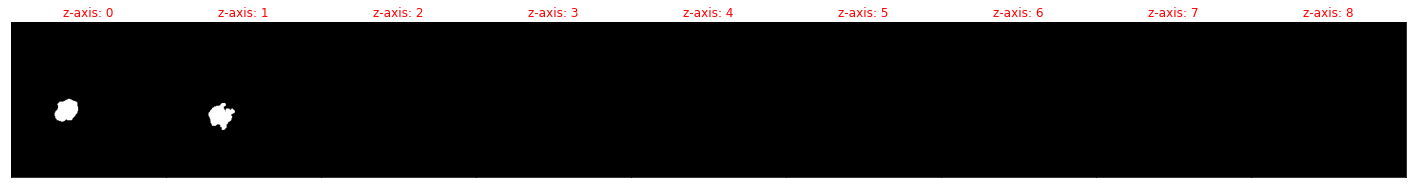

2
size:7619


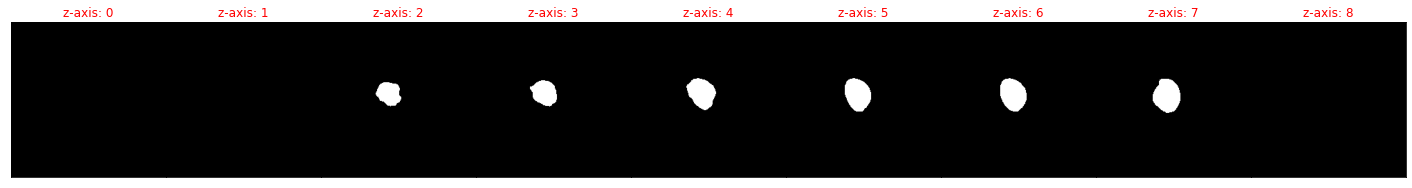

3
size:219


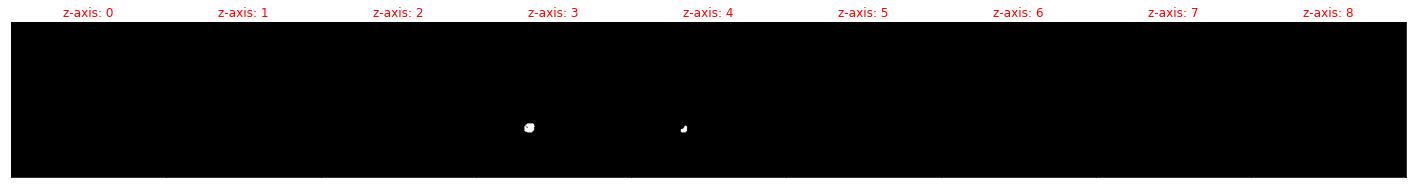

4
size:14


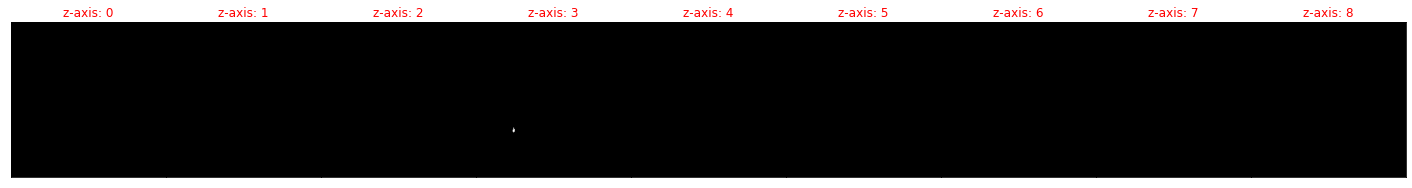

5
size:6


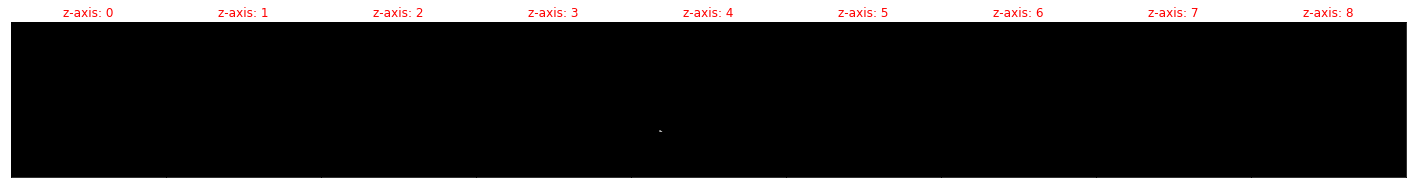

6
size:371


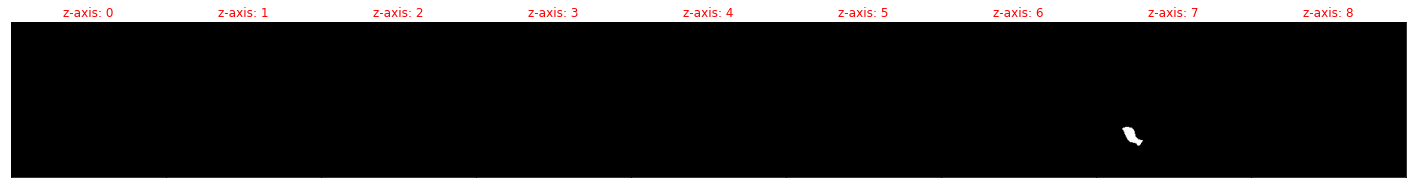

selected component (size: 7619) for label: 3


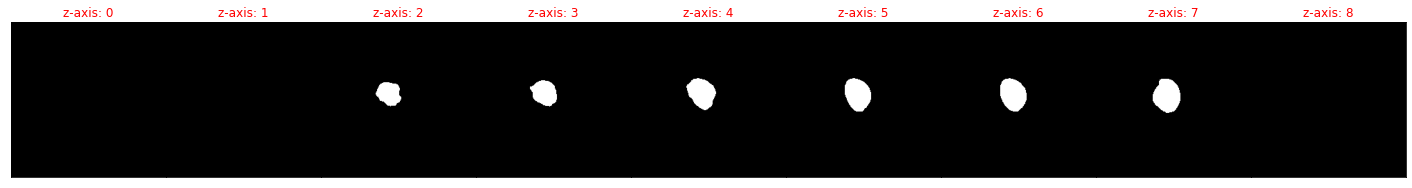

before cleaning


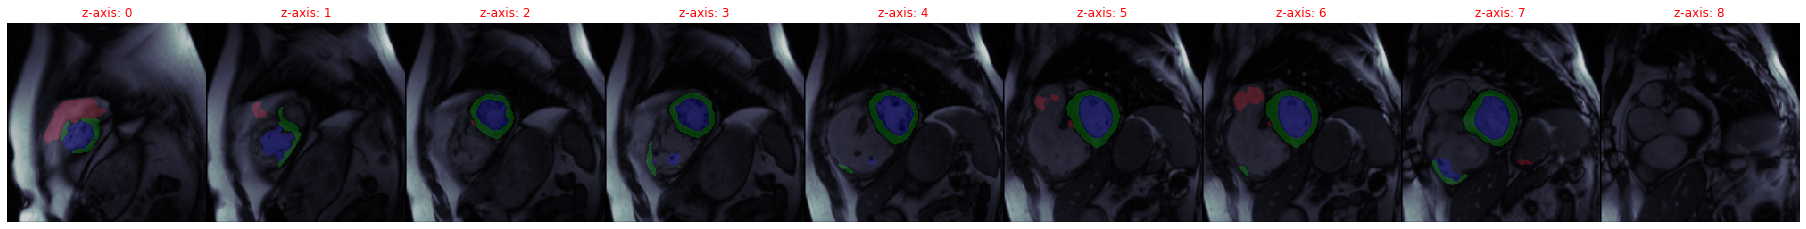

filtered by biggest connected components per label


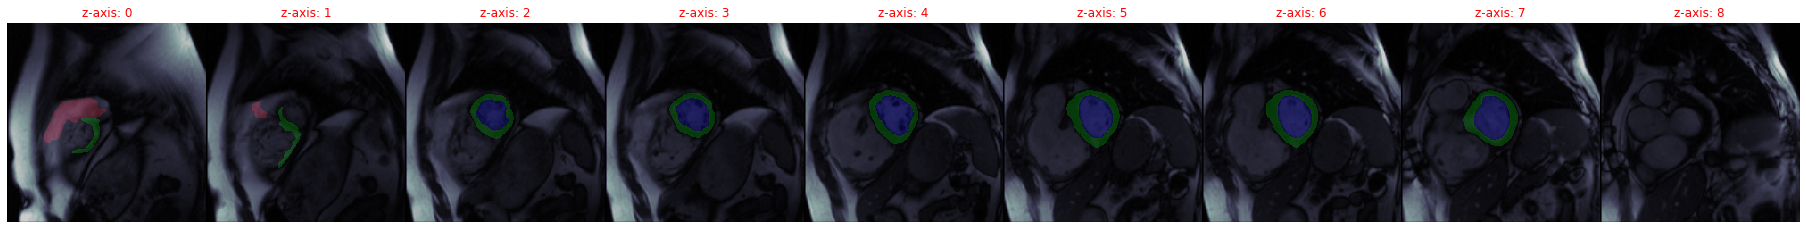

Ground truth


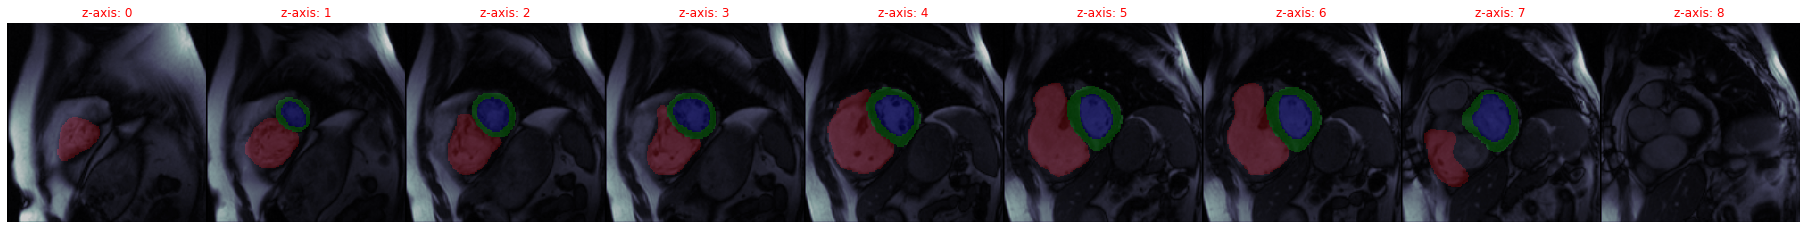

In [98]:
# find all 3D connected components for each label
from skimage import measure

cleaned = np.zeros_like(pred)
plt.show()
for val in np.unique(pred)[1:]:
    print('label: {}'.format(val))
    all_labels = measure.label(np.uint8(pred==val), background=0)
    
    biggest = np.zeros_like(pred)
    biggest_ = 0
    for l in np.unique(all_labels)[1:]:
        print(l)
        mask = all_labels == l
        mask_size = mask.sum()
        print('size:{}'.format(mask_size))
        if mask_size > biggest_:
            biggest = mask
            biggest_ = mask_size
        show_2D_or_3D(mask)
        plt.show()
    print('selected component (size: {}) for label: {}'.format(biggest_, val))
    show_2D_or_3D(biggest)
    plt.show()
    cleaned[biggest] = val
print("before cleaning")
show_2D_or_3D(img=img, mask=pred)
plt.show()
print('filtered by biggest connected components per label')
show_2D_or_3D(img=img, mask=cleaned)
plt.show()
print('Ground truth')
show_2D_or_3D(img=img, mask=gt)

In [78]:
from scipy import ndimage

In [90]:
# finds 3 objects, ndimage_obj is a list with the length 3, with 3d slicing arguments
# 0 = rv, 1 = myo, 2 = lv
ndimage_obj = ndimage.find_objects(pred)
print(len(ndimage_obj))
ndimage_obj[0]

3


(slice(0, 8, None), slice(73, 161, None), slice(35, 148, None))

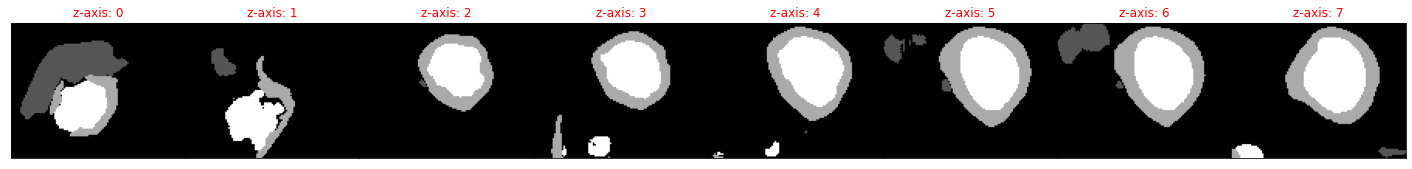

In [91]:
show_2D_or_3D(pred[ndimage_obj[0]])

3
(10, 224, 224)


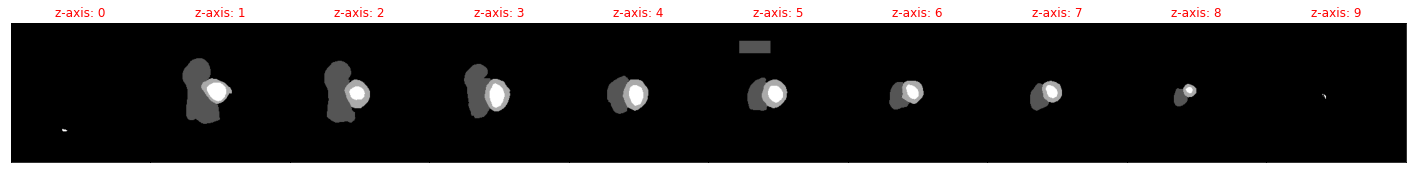

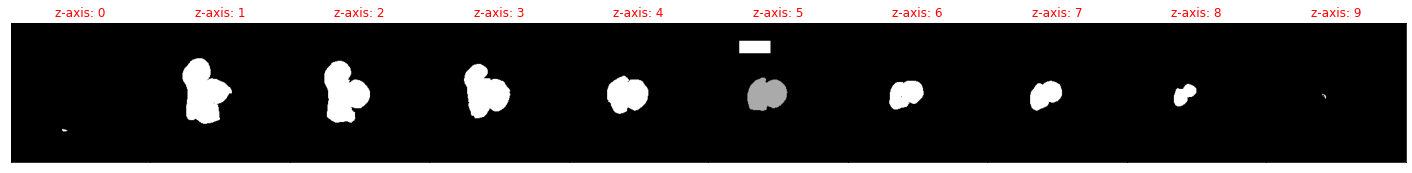

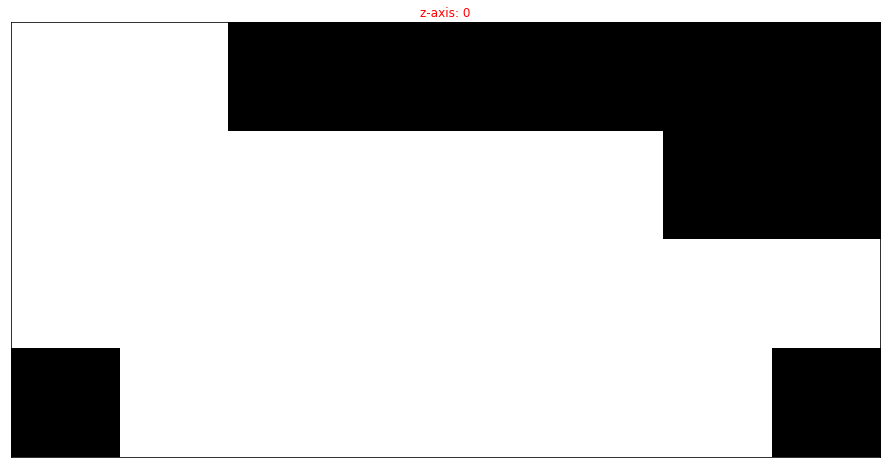

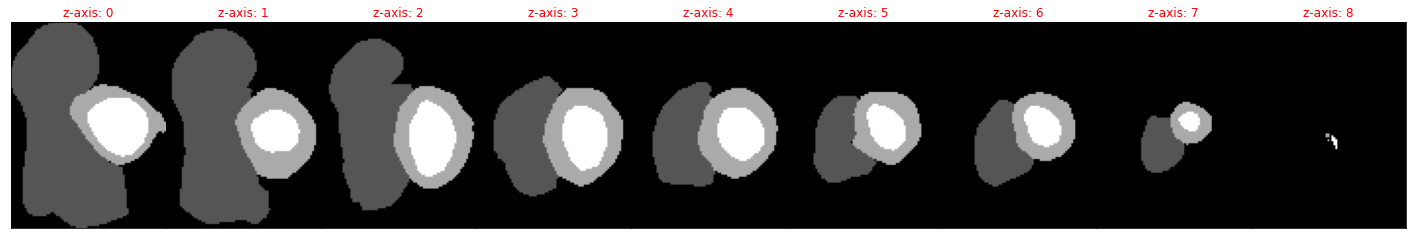

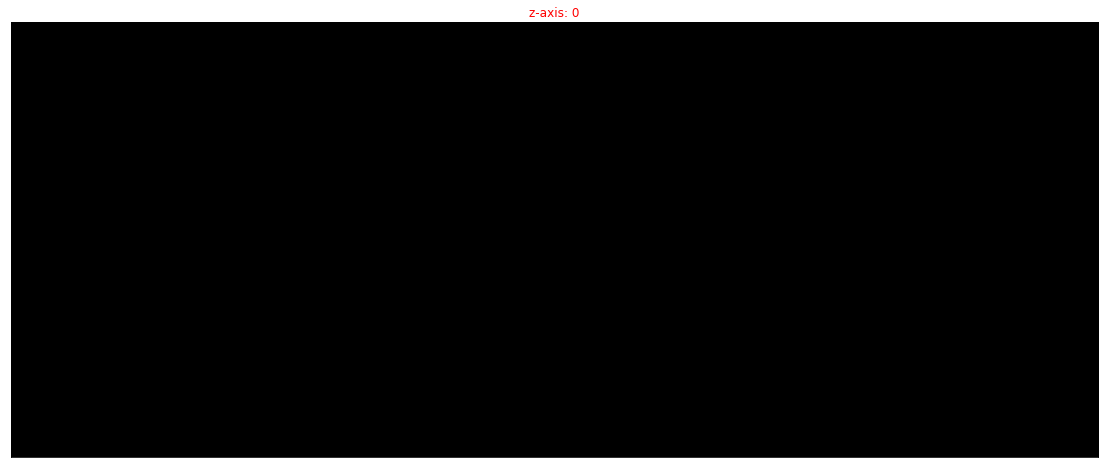

In [117]:

show_2D_or_3D(nda)
labeled_array, num_features = ndimage.label(nda)
show_2D_or_3D(labeled_array)
print(num_features)
print(labeled_array.shape)
components = ndimage.find_objects(labeled_array)
for c in components:
    show_2D_or_3D(nda[c])

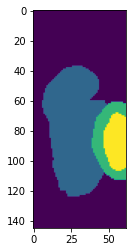

In [102]:
plt.imshow(nda[ndimage_obj[0]][3])

In [ ]:
labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]

In [110]:
# filter smaller components
new_img = np.zeros_like(nda)                                        # step 1
for val in np.unique(nda)[1:]:                                      # step 2
    mask = np.uint8(nda == val)                                     # step 3
    labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  # step 4
    print(stats)
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])      # step 5
    new_img[labels == largest_label] = val                          # step 6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/connectedcomponents.cpp:3926: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'connectedComponents_sub1'


In [134]:
import tensorflow as tf

In [87]:
tf.imag

In [89]:
blobs_labels = measure.label(nda_test, background=0)

In [94]:
np.unique(blobs_labels)

<IPython.core.display.Javascript object>

array([0, 1, 2, 3, 4, 5, 6, 7])